In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from warnings import filterwarnings
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.preprocessing import minmax_scale, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing
import joblib
import librosa
import librosa.display
from IPython.display import Audio
import tensorflow as tf
import time
import os
import random

In [ ]:
df_wst_mffcc_all_prince = pd.read_csv('/content/gdrive/MyDrive/GTZAN/wst_mffcc_all_prince.csv')

In [ ]:
df_copy= df_wst_mffcc_all_prince

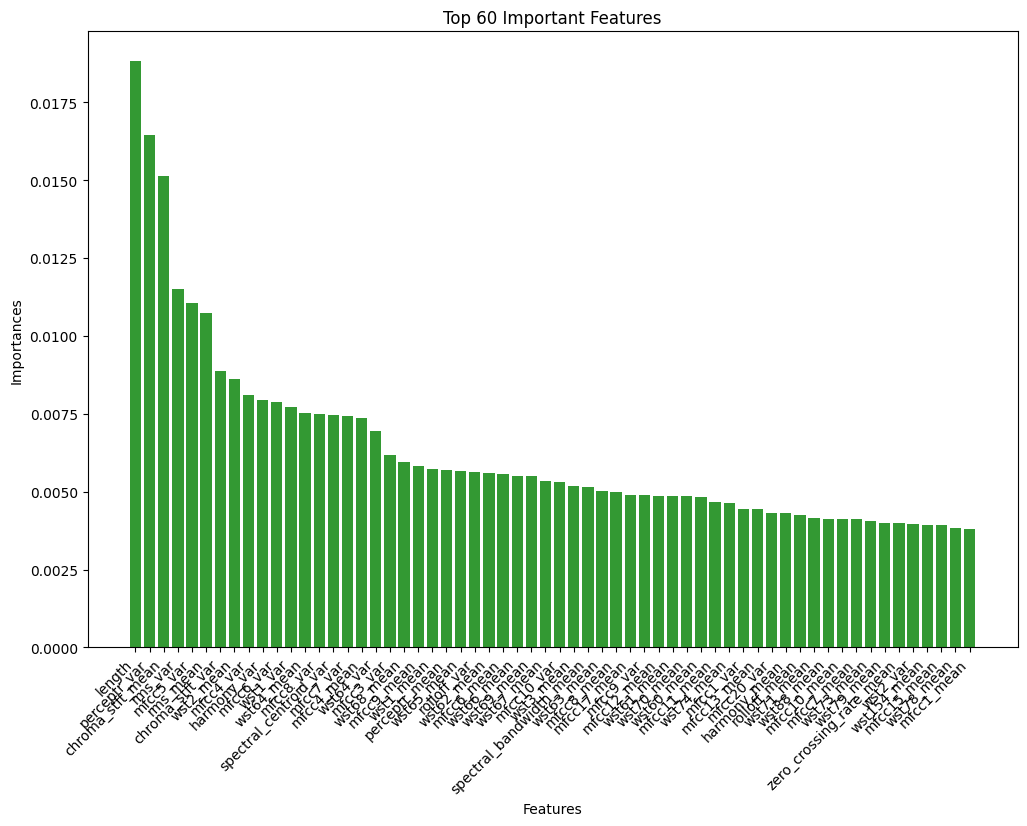

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Separate target variable and feature variables
Y_train = df_copy['label']
X_train = df_copy.drop(['label', 'filename'], axis=1)

# Create and fit the model
model = RandomForestClassifier(n_estimators=340)
model.fit(X_train, Y_train)

# Get the importances of the resulting features
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_names = X_train.columns
final_df = pd.DataFrame({"Features": feature_names, "Importances": importances})

# Sort in descending order and select the top 20 features
final_df = final_df.sort_values('Importances', ascending=False).head(60)

# Create a bar plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.bar(final_df['Features'], final_df['Importances'], color='green', alpha=0.8)
plt.xlabel('Features')
plt.ylabel('Importances')
plt.title('Top 60 Important Features')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

plt.show()

In [ ]:
final_df

,Features,Importances
444,length,0.018831
460,perceptr_var,0.016445
445,chroma_stft_mean,0.015139
448,rms_var,0.011515
471,mfcc5_var,0.011059
447,rms_mean,0.010727
446,chroma_stft_var,0.008882
2,wst2_mean,0.008617
469,mfcc4_var,0.008089
458,harmony_var,0.007946


In [ ]:
feature_name = ['filename']
for i in final_df['Features']:
  feature_name.append(i)

feature_name

['filename',
 'length',
 'perceptr_var',
 'chroma_stft_mean',
 'rms_var',
 'mfcc5_var',
 'rms_mean',
 'chroma_stft_var',
 'wst2_mean',
 'mfcc4_var',
 'harmony_var',
 'mfcc6_var',
 'wst1_var',
 'wst64_mean',
 'mfcc8_var',
 'spectral_centroid_var',
 'mfcc7_var',
 'mfcc4_mean',
 'wst64_var',
 'mfcc3_var',
 'wst68_mean',
 'mfcc9_mean',
 'wst1_mean',
 'perceptr_mean',
 'wst65_mean',
 'rolloff_var',
 'wst62_mean',
 'mfcc6_mean',
 'wst66_mean',
 'wst69_mean',
 'wst67_mean',
 'mfcc10_var',
 'wst3_mean',
 'spectral_bandwidth_mean',
 'wst63_mean',
 'mfcc8_mean',
 'mfcc17_mean',
 'mfcc9_var',
 'mfcc12_mean',
 'wst61_mean',
 'wst70_mean',
 'wst60_mean',
 'mfcc11_mean',
 'wst74_mean',
 'mfcc1_var',
 'mfcc13_mean',
 'mfcc20_var',
 'harmony_mean',
 'rolloff_mean',
 'wst71_mean',
 'wst88_mean',
 'mfcc10_mean',
 'mfcc7_mean',
 'wst73_mean',
 'wst79_mean',
 'zero_crossing_rate_mean',
 'wst2_var',
 'wst154_mean',
 'mfcc15_mean',
 'wst78_mean',
 'mfcc1_mean']

In [ ]:
feature_list= ['filename',
 'length',
 'perceptr_var',
 'chroma_stft_mean',
 'rms_var',
 'mfcc5_var',
 'rms_mean',
 'chroma_stft_var',
 'wst2_mean',
 'mfcc4_var',
 'harmony_var',
 'mfcc6_var',
 'wst1_var',
 'wst64_mean',
 'mfcc8_var',
 'spectral_centroid_var',
 'mfcc7_var',
 'mfcc4_mean',
 'wst64_var',
 'mfcc3_var',
 'wst68_mean',
 'mfcc9_mean',
 'wst1_mean',
 'perceptr_mean',
 'wst65_mean',
 'rolloff_var',
 'wst62_mean',
 'mfcc6_mean',
 'wst66_mean',
 'wst69_mean',
 'wst67_mean',
 'mfcc10_var',
 'wst3_mean',
 'spectral_bandwidth_mean',
 'wst63_mean',
 'mfcc8_mean',
 'mfcc17_mean',
 'mfcc9_var',
 'mfcc12_mean',
 'wst61_mean',
 'wst70_mean',
 'wst60_mean',
 'mfcc11_mean',
 'wst74_mean',
 'mfcc1_var',
 'mfcc13_mean',
 'mfcc20_var',
 'harmony_mean',
 'rolloff_mean',
 'wst71_mean',
 'wst88_mean',
 'mfcc10_mean',
 'mfcc7_mean',
 'wst73_mean',
 'wst79_mean',
 'zero_crossing_rate_mean',
 'wst2_var',
 'wst154_mean',
 'mfcc15_mean',
 'wst78_mean',
 'mfcc1_mean',
 'label']

In [ ]:
df_with_top60_features = df_wst_mffcc_all_prince[feature_list]
df_with_top60_features

,filename,length,perceptr_var,chroma_stft_mean,rms_var,mfcc5_var,rms_mean,chroma_stft_var,wst2_mean,mfcc4_var,...,mfcc7_mean,wst73_mean,wst79_mean,zero_crossing_rate_mean,wst2_var,wst154_mean,mfcc15_mean,wst78_mean,mfcc1_mean,label
0,blues.00000.wav,661794,0.005704,0.350129,0.002828,167.992890,0.130184,0.088772,0.000015,151.03873,...,-13.699734,0.000009,0.000016,0.083045,2.040000e-10,0.000012,-5.162783,0.000021,-113.598820,blues
1,blues.00001.wav,661794,0.003064,0.340849,0.002373,279.976040,0.095908,0.094976,0.000008,264.71670,...,-8.556513,0.000006,0.000015,0.056040,1.460000e-10,0.000005,-6.010687,0.000019,-207.523830,blues
2,blues.00002.wav,661794,0.007464,0.363538,0.002751,155.661350,0.175473,0.085257,0.000015,143.95421,...,-13.664991,0.000007,0.000011,0.076291,1.770000e-10,0.000016,-9.226244,0.000018,-90.757164,blues
3,blues.00003.wav,661794,0.002711,0.404854,0.006348,267.973720,0.141040,0.093999,0.000006,158.36113,...,-4.827845,0.000003,0.000006,0.033309,5.300000e-11,0.000007,-2.874454,0.000008,-199.575130,blues
4,blues.00004.wav,661794,0.003094,0.308526,0.002305,336.425400,0.091501,0.087843,0.000004,193.75323,...,-23.350070,0.000002,0.000004,0.101461,1.110000e-11,0.000014,-9.167669,0.000006,-160.354170,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,rock.00095.wav,661794,0.000681,0.351977,0.000346,89.958150,0.079446,0.080479,0.000019,130.92365,...,-16.488035,0.000010,0.000017,0.089227,4.620000e-10,0.000023,-10.265627,0.000024,-153.630050,rock
995,rock.00096.wav,661794,0.000818,0.398869,0.000589,81.149290,0.076423,0.075117,0.000015,66.63825,...,-18.317211,0.000008,0.000016,0.097664,2.070000e-10,0.000018,-4.373984,0.000022,-142.416210,rock
996,rock.00097.wav,661794,0.001128,0.431980,0.000322,76.998184,0.081598,0.075221,0.000019,113.74826,...,-12.417659,0.000010,0.000020,0.121823,4.370000e-10,0.000031,-11.527904,0.000029,-124.989655,rock
997,rock.00098.wav,661794,0.000654,0.362635,0.001207,156.244660,0.083802,0.091532,0.000010,189.84511,...,-10.258778,0.000005,0.000008,0.048724,1.730000e-10,0.000011,-5.282494,0.000012,-225.033330,rock


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


X = df_with_top60_features.drop(['filename', 'label'], axis=1)
y = df_with_top60_features['label']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((799, 60), (200, 60), (799,), (200,))

In [ ]:
#CNN
from keras.utils import to_categorical

X_train_cnn = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

# One-hot encoding
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

X_train_cnn.shape, X_test_cnn.shape, y_train_cnn.shape, y_test_cnn.shape

((799, 60, 1), (200, 60, 1), (799, 10), (200, 10))

In [ ]:
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Set seed values
seed_value = 42        #24= 77%
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Optional: Force TensorFlow to use CPU only to avoid GPU non-determinism
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)


model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_reshaped, y_train_categorical, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test_categorical), verbose=1, callbacks=[early_stopping])
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

report = classification_report(y_test_encoded, y_pred_classes, target_names=encoder.classes_.astype(str))
print(report)


Epoch 1/100
25/25 [==============================] - 2s 29ms/step - loss: 4.5204 - accuracy: 0.3855 - val_loss: 4.3421 - val_accuracy: 0.5500
Epoch 2/100
25/25 [==============================] - 0s 18ms/step - loss: 3.5784 - accuracy: 0.5582 - val_loss: 4.1453 - val_accuracy: 0.5300
Epoch 3/100
25/25 [==============================] - 0s 18ms/step - loss: 3.2059 - accuracy: 0.6608 - val_loss: 3.9915 - val_accuracy: 0.3700
Epoch 4/100
25/25 [==============================] - 1s 25ms/step - loss: 2.9806 - accuracy: 0.6821 - val_loss: 3.7940 - val_accuracy: 0.4500
Epoch 5/100
25/25 [==============================] - 1s 26ms/step - loss: 2.7371 - accuracy: 0.7146 - val_loss: 3.6202 - val_accuracy: 0.3250
Epoch 6/100
25/25 [==============================] - 1s 27ms/step - loss: 2.5666 - accuracy: 0.7309 - val_loss: 3.4021 - val_accuracy: 0.4450
Epoch 7/100
25/25 [==============================] - 1s 27ms/step - loss: 2.4030 - accuracy: 0.7835 - val_loss: 3.3223 - val_accuracy: 0.3350
Epoch 